In [1]:
import re
import os
import math
import nltk
import time
import re
import string
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
#In this body of code, we have taken first 5000 rows of our original dataset to implement a code to test Regex, data cleaning
#Tokenization, stop words elimination - all operations on the "Bio" column of the data frame so that user profile data
#can be used in further analysis in the remaining stages. 

In [4]:
#Steps to data cleaning and preparation fort the analysis
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)
#Step 6: Regex
#Step 7: Tokenize
#Step 8: Stopwords

In [5]:
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame

In [6]:
os.chdir(r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project')

In [7]:
import pandas as pd

df_dating = pd.read_excel (r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project\Input_project_v11_age.xlsx')


In [8]:
#The bottom line removes all emojis from the text, this will help clean the text

In [9]:
df_dating.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,nan,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",nan,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,nan,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,nan,socially,1,nan,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",nan,nan,buddhism,nan,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,65,51+,single,f,straight,fit,nan,socially,1,never,...,humanities_arts_entertainment,2011-08-19-18-51,"oakland, california",nan,nan,nan,libra but it doesn&rsquo;t matter,no,english (fluently),my friends describe me as a beautiful on the i...
10846,55,51+,single,f,straight,full figured,anything,rarely,0,never,...,business,2012-06-19-08-45,"half moon bay, california","has kids, but doesn't want more",dislikes cats,catholicism but not too serious about it,leo but it doesn&rsquo;t matter,no,english,"my friends would say i've got a caring, nurtur..."
10847,51,51+,single,m,straight,average,strictly anything,rarely,0,never,...,business,2012-06-30-06-26,"san francisco, california",has a kid,nan,atheism but not too serious about it,nan,sometimes,english,in the suburbs not by choice but necessity. i ...
10848,65,51+,single,f,straight,curvy,mostly anything,socially,1,never,...,other,2012-06-30-19-11,"san lorenzo, california",has kids,has dogs and has cats,catholicism and very serious about it,scorpio and it matters a lot,no,"english, english, french, spanish",i am fun loving and romantic. a bouquet of flo...


In [10]:
df_dating["Bio"] = df_dating["Bio"].str.lower()

In [11]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."


In [12]:
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)

In [13]:
#df['Bio'].str.lower()
bio_token1 = pd.DataFrame(df_dating, columns = ['Bio'])
print(bio_token1[0:5])

                                                 Bio
0  about me:  i would love to think that i was so...
1  my name is ashley and i live in san francisco....
2  full-time student, full-time square. i change ...
3  "apparently," has become a new favorite word o...
4  i grew up in iowa. it gets a bad rap, but let ...


In [14]:
#Step 6: Regex

In [15]:
import nltk

df_dating['Bio'] = df_dating['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()

In [16]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [17]:
#Step 7: Tokenize

In [18]:
splitwords = [ nltk.word_tokenize( str(sentence) ) for sentence in df_dating["Bio"] ]

In [19]:
#Step 8: Stopwords

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop = stopwords.words("English")
df_dating['Bio'] = df_dating['Bio'].apply(lambda x: [item for item in str(x).split() if item not in stop])

In [22]:
bio_token2 = pd.DataFrame(df_dating, columns = ['Bio'])
print(bio_token2[0:5])

                                                 Bio
0  [would, love, think, kind, intellectual, eithe...
1  [name, ashley, live, san, francisco, love, dan...
2  [fulltime, student, fulltime, square, change, ...
3  [apparently, become, new, favorite, word, mine...
4  [grew, iowa, gets, bad, rap, let, first, tell,...


In [23]:
df_dating_NB = pd.read_excel (r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project\Input_project_v4_5000.xlsx')

In [24]:
df_dating_NB = df_dating_NB[df_dating_NB['Bio'].notna()]

In [25]:
df_dating_NB.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_dating_NB["Bio"] = df_dating_NB["Bio"].str.lower()

In [26]:
import nltk

df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()

In [27]:
df_dating_top_NB = df_dating_NB.head()

In [28]:
#Number of rows in the dataframe
len(df_dating_NB)

4862

In [29]:
#Clean text Bio
bio_token_NB= pd.DataFrame(df_dating_NB, columns = ['Bio'])
print(bio_token_NB[0:5])

                                                 Bio
0  about me i would love to think that i was some...
1  i am a chef this is what that means i am a wor...
2  i work in a library and go to school reading t...
3  hey hows it going currently vague on the profi...
4  im an australian living in san francisco but d...


In [30]:
drinks_labels_NB = df_dating_NB['drinks'].tolist()

In [31]:
#Printing all the clean data from Bio column
all_data_NB = df_dating_NB['Bio'].tolist()

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

drinks_train_data, drinks_test_data, drinks_train_labels, drinks_test_labels = train_test_split(all_data_NB, drinks_labels_NB, test_size=0.2)
    

In [33]:
#Using the MultinomialNB module from scikit-learn package (see sample code in NaiveBayes.ipynb on 
#Canvas under Text Classification), build a model and predict the labels for the test_data.

In [34]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [35]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from tokenize import tokenize, untokenize
from io import BytesIO

In [36]:
#import math
#mylist = train_data
#train_data_NB = [x for x in mylist if x != 'nan']
#len(train_data_NB)
#print(train_data_NB[0:100])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(drinks_train_data)
X

<3889x52669 sparse matrix of type '<class 'numpy.int64'>'
	with 872219 stored elements in Compressed Sparse Row format>

In [38]:
# convert to a Pandas DataFrame to view the counts
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,__,___,____,_____,______,_______,__________,________________________________________________,_________________________________________________,__________________________________________________,...,zupay,zurich,zwan,zydeco,zynga,zyzzyva,zz,zzzzz,zzzzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#get tf-idf values to represent a document as a vector of numbers
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(drinks_train_data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,__,___,____,_____,______,_______,__________,________________________________________________,_________________________________________________,__________________________________________________,...,zupay,zurich,zwan,zydeco,zynga,zyzzyva,zz,zzzzz,zzzzzz,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# pipelines set up a sequence of transformations to be applied one after another on the data
# here the tf-idf transformation is followed by Multinomial Naive Bayes 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [41]:
len(drinks_train_data)

3889

In [42]:
# fit the model using the training data and then predict the targets/labels of test data
model.fit(drinks_train_data, drinks_train_labels)
drinks_predict_labels = model.predict(drinks_test_data)

In [43]:
drinks_set_labels = np.unique(drinks_train_labels)

drinks_set_test_labels = np.unique(drinks_test_labels)

#Size of the confusion matrix will be determined by knowing the unique values here

In [44]:
x = len(drinks_set_labels)
y = len(drinks_set_test_labels)
print(x,y)

6 6


In [45]:
#Generate and display the confusion matrix of your model as a heatmap plot.

In [46]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [47]:
# PART IV: put your code after this line and run the cell to display the heatmap
# You may use multiple cells

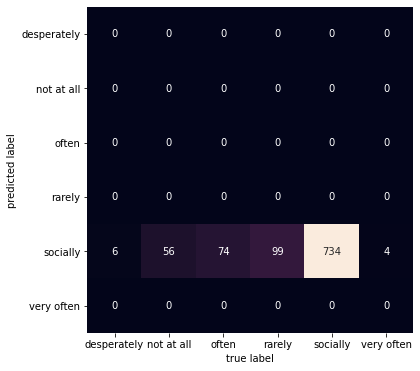

In [48]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(drinks_test_labels, drinks_predict_labels)
plt.figure(figsize=(x,y))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=drinks_set_labels, yticklabels=drinks_set_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
#Compute Scores
# PART V: put your code after this line and run the cell to display the scores

from sklearn.metrics import precision_score

In [50]:
#Average is assigned micro
#
precisionScore_sklearn_microavg = precision_score(drinks_test_labels, drinks_predict_labels, average='micro')
#
# Average is assigned macro
#
precisionScore_sklearn_macroavg = precision_score(drinks_test_labels, drinks_predict_labels, average='macro')
#
# Printing micro and macro average precision score
#
precisionScore_sklearn_microavg, precisionScore_sklearn_macroavg

C:\Users\jeffd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7543679342240494, 0.12572798903734156)

In [51]:
from sklearn.metrics import f1_score
f1_score(drinks_test_labels, drinks_predict_labels, average=None)

array([0.        , 0.        , 0.        , 0.        , 0.85998828,
       0.        ])

In [52]:
f1_score(drinks_test_labels, drinks_predict_labels, average='micro')

0.7543679342240494

In [53]:
f1_score(drinks_test_labels, drinks_predict_labels, average='macro')

0.14333138058972858

In [54]:
f1_score(drinks_test_labels, drinks_predict_labels, average='weighted')

0.6487475849097273